<a href="https://colab.research.google.com/github/Ayesha-Feroz/Ayesha-Feroz/blob/main/pyopenms%20eubic%20tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## To install pyOpenMS go to https://colab.google/ and then New Notebook and then run this command on the cell.
pip install pyopenms

In [14]:
##TASK01 SPECTRA AND PEAKS
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/ms_data.html
## Try to generate 10 random intensities and 10 random M/Z’s. Add them to a spectrum. Print them using getMZ() and getIntensity().
## Run sortByPosition() and print them again
import pyopenms as oms

spectrum = oms.MSSpectrum()
mz = range(500, 1500, 100)
i = [1 for mass in mz]
spectrum.set_peaks([mz, i])

# Sort the peaks according to ascending mass-to-charge ratio
spectrum.sortByPosition()

# Iterate over spectrum of those peaks
for p in spectrum:
    print(p.getMZ(), p.getIntensity())

# Access a peak by index
print("\nFirst peak: ", spectrum[0].getMZ(), spectrum[0].getIntensity())

500.0 1.0
600.0 1.0
700.0 1.0
800.0 1.0
900.0 1.0
1000.0 1.0
1100.0 1.0
1200.0 1.0
1300.0 1.0
1400.0 1.0

First peak:  500.0 1.0


In [12]:
# See how we can set properties in a mass spectrum
spectrum = oms.MSSpectrum()
spectrum.setDriftTime(25)  # 25 ms
spectrum.setRT(205.2)  # 205.2 s
spectrum.setMSLevel(3)  # MS3

# Add peak(s) to spectrum
spectrum.set_peaks(([401.5], [900]))

# create precursor information
p = oms.Precursor()
p.setMZ(600)  # isolation at 600 +/- 1.5 Th
p.setIsolationWindowLowerOffset(1.5)
p.setIsolationWindowUpperOffset(1.5)
p.setActivationEnergy(40)  # 40 eV
p.setCharge(4)  # 4+ ion

# and store precursor in spectrum
spectrum.setPrecursors([p])

# set additional instrument settings (e.g. scan polarity)
IS = oms.InstrumentSettings()
IS.setPolarity(oms.IonSource.Polarity.POSITIVE)
spectrum.setInstrumentSettings(IS)

# get and check scan polarity
polarity = spectrum.getInstrumentSettings().getPolarity()
if polarity == oms.IonSource.Polarity.POSITIVE:
    print("scan polarity: positive")
elif polarity == oms.IonSource.Polarity.NEGATIVE:
    print("scan polarity: negative")

# Optional: additional data arrays / peak annotations
fda = oms.FloatDataArray()
fda.setName("Signal to Noise Array")
fda.push_back(15)
sda = oms.StringDataArray()
sda.setName("Peak annotation")
sda.push_back("y15++")
spectrum.setFloatDataArrays([fda])
spectrum.setStringDataArrays([sda])

# Add spectrum to MSExperiment
exp = oms.MSExperiment()
exp.addSpectrum(spectrum)

# Add second spectrum to the MSExperiment
spectrum2 = oms.MSSpectrum()
spectrum2.set_peaks(([1, 2], [1, 2]))
exp.addSpectrum(spectrum2)

# store spectra in mzML file
oms.MzMLFile().store("testfile.mzML", exp)

scan polarity: positive


In [15]:
##TASK 02 MASS CALCULATION
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/peptides_proteins.html
## Calculate peptide mass (directly or from the formula)
##Uncharged masses, charged masses

import pyopenms as oms

seq = oms.AASequence.fromString(
    "DFPIANGER"
)  # create AASequence object from string representation
prefix = seq.getPrefix(4)  # extract prefix of length 4
suffix = seq.getSuffix(5)  # extract suffix of length 5
concat = seq + seq  # concatenate two sequences

# print string representation of sequences
print("Sequence:", seq)
print("Prefix:", prefix)
print("Suffix:", suffix)
print("Concatenated:", concat)

# some mass calculations
mfull = seq.getMonoWeight()  # weight of M
mprecursor = seq.getMonoWeight(oms.Residue.ResidueType.Full, 2)  # weight of M+2H

# we can calculate mass-over-charge manually
mz = seq.getMonoWeight(oms.Residue.ResidueType.Full, 2) / 2.0  # m/z of [M+2H]2+
# or simply by:
mz = seq.getMZ(2)  # same as above

print()
print("Monoisotopic mass of peptide [M] is", mfull)
print("Monoisotopic mass of peptide precursor [M+2H]2+ is", mprecursor)
print("Monoisotopic m/z of [M+2H]2+ is", mz)

Sequence: DFPIANGER
Prefix: DFPI
Suffix: ANGER
Concatenated: DFPIANGERDFPIANGER

Monoisotopic mass of peptide [M] is 1017.4879641373001
Monoisotopic mass of peptide precursor [M+2H]2+ is 1019.5025170708419
Monoisotopic m/z of [M+2H]2+ is 509.75125853542096


In [16]:
##Amino acids information from a peptide sequence
seq = oms.AASequence.fromString("DFPIANGER")

print("The peptide", str(seq), "consists of the following amino acids:")
for aa in seq:
    print(aa.getName(), ":", aa.getMonoWeight())

The peptide DFPIANGER consists of the following amino acids:
Aspartate : 133.0375092233
Phenylalanine : 165.0789793509
Proline : 115.06332928709999
Isoleucine : 131.0946294147
Alanine : 89.0476792233
Asparagine : 132.0534932552
Glycine : 75.0320291595
Glutamate : 147.0531592871
Arginine : 174.1116764466


In [21]:
#Calculate the molecular formula from a sequence
seq = oms.AASequence.fromString("DFPIANGER")
seq_formula = seq.getFormula()
print("Peptide", seq, "has molecular formula", seq_formula)

Peptide DFPIANGER has molecular formula C44H67N13O15


In [22]:
##print the coarse (e.g., peaks only at nominal masses) distribution.
coarse_isotopes = seq_formula.getIsotopeDistribution(
    oms.CoarseIsotopePatternGenerator(6)
)
for iso in coarse_isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )

Isotope 1017.4879641373001 has abundance 56.8165123462677 %
Isotope 1018.4913189751001 has abundance 30.52913248538971 %
Isotope 1019.4946738129 has abundance 9.802105277776718 %
Isotope 1020.4980286507001 has abundance 2.3292064666748047 %
Isotope 1021.5013834885001 has abundance 0.4492596723139286 %
Isotope 1022.5047383263001 has abundance 0.07378293084912002 %


In [23]:
# print fine structure of isotope distribution (used for high resolution to reveal additional peaks)
fine_isotopes = seq_formula.getIsotopeDistribution(
    oms.FineIsotopePatternGenerator(0.01)
)  # max 0.01 unexplained probability
for iso in fine_isotopes.getContainer():
    print(
        "Isotope", iso.getMZ(), "has abundance", iso.getIntensity() * 100, "%"
    )

Isotope 1017.4879641373001 has abundance 56.80969953536987 %
Isotope 1018.4849991373001 has abundance 2.7278145775198936 %
Isotope 1018.4913191373001 has abundance 27.035287022590637 %
Isotope 1018.4921811373001 has abundance 0.3246041014790535 %
Isotope 1018.4942408854 has abundance 0.4377691075205803 %
Isotope 1019.4883541373001 has abundance 1.2981452979147434 %
Isotope 1019.4922181373001 has abundance 1.7511537298560143 %
Isotope 1019.4946741373 has abundance 6.286735832691193 %
Isotope 1019.4975958854001 has abundance 0.2083308296278119 %
Isotope 1020.4917091373001 has abundance 0.3018683288246393 %
Isotope 1020.4955731373002 has abundance 0.833360105752945 %
Isotope 1020.4980291373 has abundance 0.9519387967884541 %
Isotope 1021.4989281373 has abundance 0.1937880413606763 %


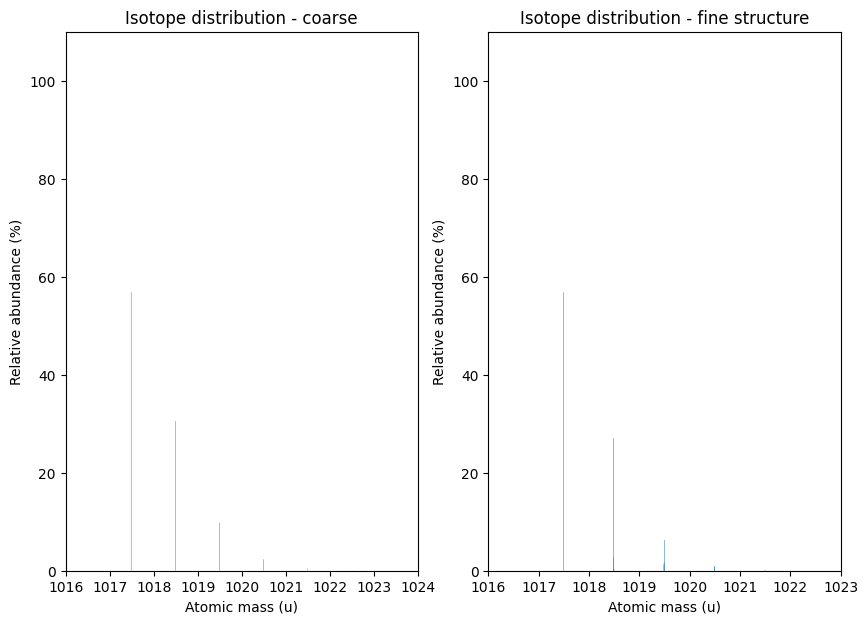

In [24]:
##Now we can also visually see the isotope distribution of coarse and fine.
import math
from matplotlib import pyplot as plt


def plotIsotopeDistribution(isotope_distribution, title="Isotope distribution"):
    plt.title(title)
    distribution = {"mass": [], "abundance": []}
    for iso in isotope_distribution.getContainer():
        distribution["mass"].append(iso.getMZ())
        distribution["abundance"].append(iso.getIntensity() * 100)

    bars = plt.bar(
        distribution["mass"], distribution["abundance"], width=0.01, snap=False
    )  # snap ensures that all bars are rendered

    plt.ylim([0, 110])
    plt.xticks(
        range(
            math.ceil(distribution["mass"][0]) - 2,
            math.ceil(distribution["mass"][-1]) + 2,
        )
    )
    plt.xlabel("Atomic mass (u)")
    plt.ylabel("Relative abundance (%)")


plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plotIsotopeDistribution(coarse_isotopes, "Isotope distribution - coarse")
plt.subplot(1, 2, 2)
plotIsotopeDistribution(fine_isotopes, "Isotope distribution - fine structure")
plt.show()

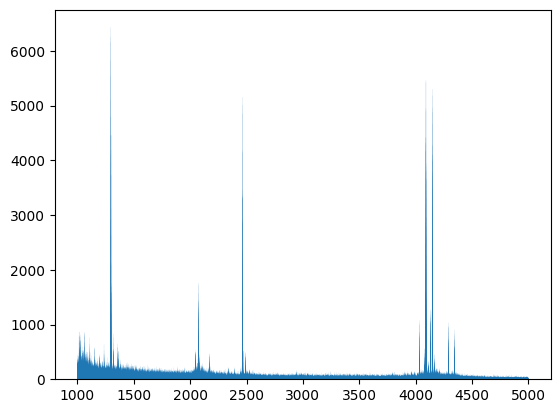

In [25]:
## TASK 3 Spectrum Normalization
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/spectrum_normalization.html
##  load a spectrum from an mzML file using the pyOpenMS library
from urllib.request import urlretrieve
import pyopenms as oms
import matplotlib.pyplot as plt

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/peakpicker_tutorial_1_baseline_filtered.mzML", "tutorial.mzML")

exp = oms.MSExperiment()
oms.MzMLFile().load("tutorial.mzML", exp)

plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()

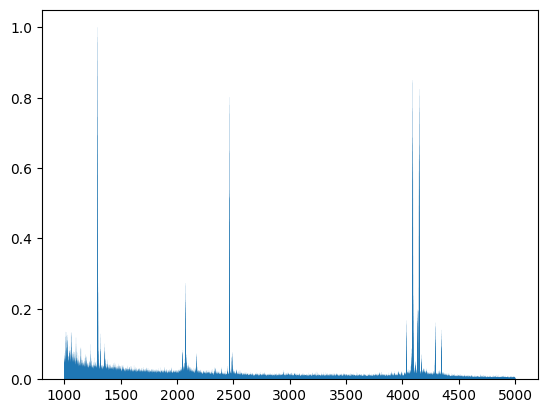

In [27]:
## Normalization Procedure
## After loading the data, the next step is to apply normalization.
normalizer = oms.Normalizer()
param = normalizer.getParameters()
param.setValue("method", "to_one")
normalizer.setParameters(param)

normalizer.filterPeakMap(exp)
plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()

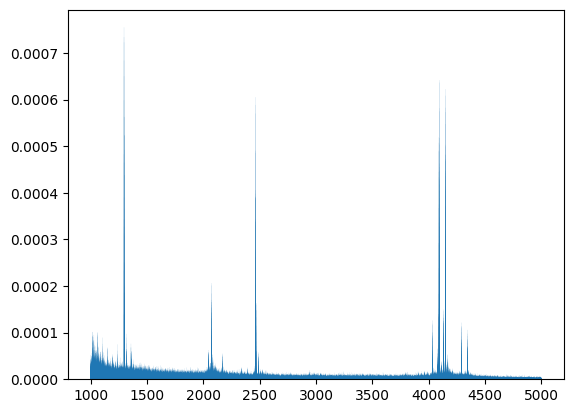

In [28]:
##Another approach to normalization is using the Total Ion Count (TIC).
##This method adjusts the intensities so that their total sum equals 1.0 in each mass spectrum.
param.setValue("method", "to_TIC")
normalizer.setParameters(param)
normalizer.filterPeakMap(exp)
plt.bar(exp.getSpectrum(0).get_peaks()[0], exp.getSpectrum(0).get_peaks()[1], snap=False)
plt.show()


In [29]:
## TASK 4 Centroiding
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/centroiding.html
## First, we load some profile data
from urllib.request import urlretrieve
import pyopenms as oms
import matplotlib.pyplot as plt

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/PeakPickerHiRes_input.mzML", "tutorial.mzML")

profile_spectra = oms.MSExperiment()
oms.MzMLFile().load("tutorial.mzML", profile_spectra)

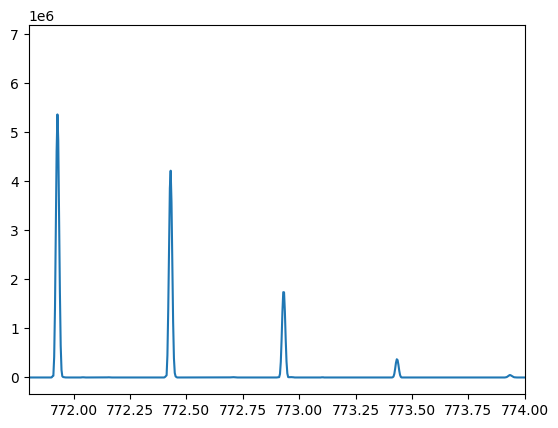

In [30]:
##Let’s zoom in on an isotopic pattern in profile mode and plot it.
plt.xlim(771.8, 774)  # zoom into isotopic pattern
plt.plot(
    profile_spectra[0].get_peaks()[0], profile_spectra[0].get_peaks()[1]
)  # plot the first spectrum

<StemContainer object of 3 artists>

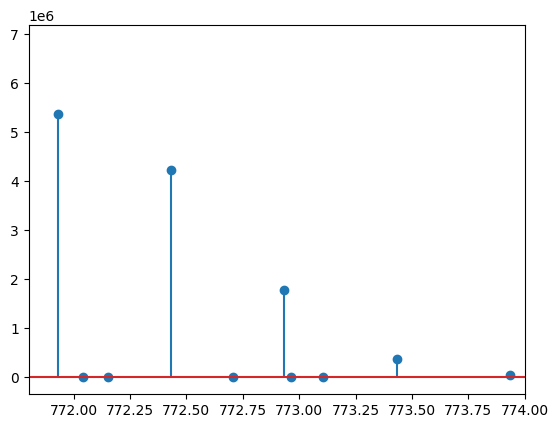

In [31]:
##Because of the limited resolution of MS instruments m/z measurements are not of unlimited precision.
##Consequently, peak shapes spreads in the m/z dimension and resemble a gaussian distribution.
##Using the PeakPickerHiRes algorithm, we can convert data from profile to centroided mode.
##Usually, not much information is lost by storing only centroided data.
##Thus, many algorithms and tools assume that centroided data is provided.
centroided_spectra = oms.MSExperiment()

# input, output, chec_spectrum_type (if set, checks spectrum type and throws an exception if a centroided spectrum is passed)
oms.PeakPickerHiRes().pickExperiment(
    profile_spectra, centroided_spectra, True
)  # pick all spectra

plt.xlim(771.8, 774)  # zoom into isotopic pattern
plt.stem(
    centroided_spectra[0].get_peaks()[0], centroided_spectra[0].get_peaks()[1]
)  # plot as vertical lines

In [33]:
##TASK 5 FRAGMENT SPECTRUM GENERATION
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/fragment_spectrum_generation.html
##First, we will generate a simple mass spectrum that only contains y-ions
import pyopenms as oms

tsg = oms.TheoreticalSpectrumGenerator()
spec1 = oms.MSSpectrum()
peptide = oms.AASequence.fromString("DFPIANGER")
# standard behavior is adding b- and y-ions of charge 1
p = oms.Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1)  # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())



Spectrum 1 of DFPIANGER has 8 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
y4+ is generated at m/z 475.225939423771
y5+ is generated at m/z 546.2630535832709
y6+ is generated at m/z 659.3471179341709
y7+ is generated at m/z 756.3998821574709
y8+ is generated at m/z 903.4682964445708


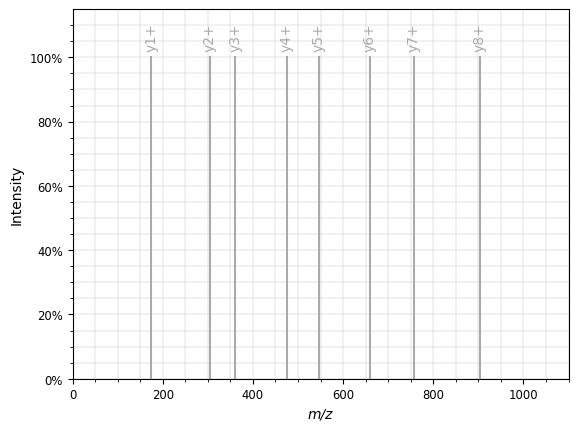

In [34]:
##Plotting anotted ions
import matplotlib.pyplot as plt
from pyopenms.plotting import plot_spectrum
import matplotlib.pyplot as plt

plot_spectrum(spec1)
plt.show()

In [35]:
## Full Fragment Ion Mass Spectrum
## We can also produce additional peaks in the fragment ion mass spectrum, such as isotopic peaks, precursor peaks,
#ions from higher charge states, additional ion series, or common neutral losses
spec2 = oms.MSSpectrum()
# standard behavior is adding b- and y-ions
p2 = oms.Param()
p2.setValue("add_a_ions", "true")
# adding n-term ion (in this case, a1 and b1)
p2.setValue("add_first_prefix_ion", "true")
p2.setValue("add_precursor_peaks", "true")
# standard is to add precursor peaks with only the largest charge
p2.setValue("add_all_precursor_charges", "true")
p2.setValue("add_losses", "true")
p2.setValue("add_metainfo", "true")
tsg.setParameters(p2)
tsg.getSpectrum(spec2, peptide, 1, 2)

# Iterate over annotated ions and their masses
print("Spectrum 2 of", peptide, "has", spec2.size(), "peaks.")
for ion, peak in zip(spec2.getStringDataArrays()[0], spec2):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

exp = oms.MSExperiment()
exp.addSpectrum(spec1)
exp.addSpectrum(spec2)
oms.MzMLFile().store("DFPIANGER.mzML", exp)

Spectrum 2 of DFPIANGER has 160 peaks.
a1-H2O1++ is generated at m/z 35.518008514620995
a1++ is generated at m/z 44.523291046520995
b1-H2O1++ is generated at m/z 49.515466014621
b1++ is generated at m/z 58.520748546521
y1-C1H2N1O1++ is generated at m/z 66.05629515817103
y1-C1H2N2++ is generated at m/z 67.05221565817102
a1-H2O1+ is generated at m/z 70.02874056247099
y1-H3N1++ is generated at m/z 79.54984014222102
a1+ is generated at m/z 88.03930562627099
y1++ is generated at m/z 88.06311469007102
b1-H2O1+ is generated at m/z 98.02365556247099
a2-H2O1++ is generated at m/z 109.05221565817098
b1+ is generated at m/z 116.034220626271
a2++ is generated at m/z 118.05749819007099
b2-H2O1++ is generated at m/z 123.04967315817098
y2-C1H2N1O1++ is generated at m/z 130.57759226982103
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y2-C1H2N2++ is generated at m/z 131.573512769821
b2++ is generated at m/z 132.05495569007098
y1-C1H2N2+ is generated at m/z 133.097154849571
y2-H2O1++ is generated 

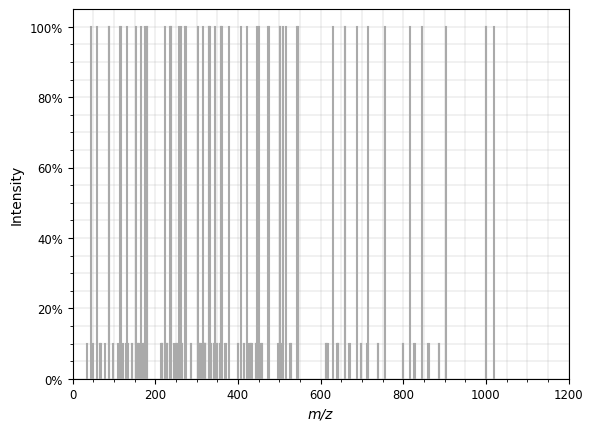

In [36]:
## above code outputs all 160 peaks that are generated (this is without isotopic peaks), here we will just show the first few peaks:
## which you can again visualize with
import matplotlib.pyplot as plt
from pyopenms.plotting import plot_spectrum
import matplotlib.pyplot as plt

plot_spectrum(spec2, annotate_ions=False)
plt.show()

The first example shows how to put peaks of a certain type, y-ions in this case, into a mass spectrum. The second mass spectrum is filled with a complete fragment ion mass spectrum of all peaks (a-, b-, y-ions, precursor peaks, and losses).

In [42]:
##TASK 6 SIMPLE SEARCH
##Go to https://pyopenms.readthedocs.io/en/latest/user_guide/peptide_search.html
## In most proteomics applications, a dedicated search engine (such as Comet, Crux, Mascot, MSGFPlus, MSFragger, Myrimatch, OMSSA, SpectraST or XTandem;
##all of which are supported by pyOpenMS) will be used to search data.
##Here, we will use the internal SimpleSearchEngineAlgorithm from OpenMS used for teaching purposes.
##This makes it very easy to search an (experimental) mzML file against a fasta database of protein sequences:
from urllib.request import urlretrieve
import pyopenms as oms

# Downloading the required files
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/SimpleSearchEngine_1.mzML", "searchfile.mzML")
urlretrieve(gh + "/src/data/SimpleSearchEngine_1.fasta", "search.fasta")

# Running the SimpleSearchEngineAlgorithm
protein_ids = []
peptide_ids = []
oms.SimpleSearchEngineAlgorithm().search("searchfile.mzML", "search.fasta", protein_ids, peptide_ids)

# Function to extract and display statistics
def display_peptide_statistics(peptide_ids):
    unmatched = 0
    match_target_only = 0
    match_decoy_only = 0
    match_both = 0

    for peptide_id in peptide_ids:
        for hit in peptide_id.getHits():
            target_decoy = hit.getMetaValue("target_decoy")
            if target_decoy == "target":
                match_target_only += 1
            elif target_decoy == "decoy":
                match_decoy_only += 1
            else:
                unmatched += 1

    total = len(peptide_ids)
    if total > 0:
        print("Peptide statistics:")
        print(f"  unmatched                : {unmatched} ({unmatched / total * 100:.2f} %)")
        print(f"  target/decoy:")
        print(f"    match to target DB only: {match_target_only} ({match_target_only / total * 100:.2f} %)")
        print(f"    match to decoy DB only : {match_decoy_only} ({match_decoy_only / total * 100:.2f} %)")
        print(f"    match to both          : {match_both} ({match_both / total * 100:.2f} %)")

# Displaying the statistics
display_peptide_statistics(peptide_ids)





Peptide statistics:
  unmatched                : 0 (0.00 %)
  target/decoy:
    match to target DB only: 3 (100.00 %)
    match to decoy DB only : 0 (0.00 %)
    match to both          : 0 (0.00 %)


In [43]:
##Investigate PSMs
for peptide_id in peptide_ids:
    # Peptide identification values
    print(35 * "=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide scan name:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
    # PeptideHits
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit charge:", hit.getCharge())
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = (
            hit.getSequence().getMonoWeight(
                oms.Residue.ResidueType.Full, hit.getCharge()
            )
            / hit.getCharge()
        )
        print(" - Peptide hit monoisotopic m/z:", mz)
        print(
            " - Peptide ppm error:", abs(mz - peptide_id.getMZ()) / mz * 10**6
        )
        print(" - Peptide hit score:", hit.getScore())

Peptide ID m/z: 520.262817382812
Peptide ID rt: 2655.095703125
Peptide scan index: 0
Peptide scan name: 0
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 3
 - Peptide hit sequence: DFASSGGYVLHLHR
 - Peptide hit monoisotopic m/z: 520.2635538953376
 - Peptide ppm error: 1.4156527399679193
 - Peptide hit score: 16.84163475036621
Peptide ID m/z: 1063.20983886719
Peptide ID rt: 4587.6689453125
Peptide scan index: 1
Peptide scan name: 1
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 3
 - Peptide hit sequence: IALSRPNVEVVALNDPFITNDYAAYM(Oxidation)FK
 - Peptide hit monoisotopic m/z: 1063.2092724146712
 - Peptide ppm error: 0.5327761274224441
 - Peptide hit score: 42.21834182739258
Peptide ID m/z: 775.38720703125
Peptide ID rt: 4923.77734375
Peptide scan index: 2
Peptide scan name: 2
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 3
 - Peptide hit sequence: RPGADSDIGGFGGLFDLAQAGFR
 - Peptide hit mon

In [44]:
tsg = oms.TheoreticalSpectrumGenerator()
thspec = oms.MSSpectrum()
p = oms.Param()
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
peptide = oms.AASequence.fromString("RPGADSDIGGFGGLFDLAQAGFR")
tsg.getSpectrum(thspec, peptide, 1, 1)
# Iterate over annotated ions and their masses
for ion, peak in zip(thspec.getStringDataArrays()[0], thspec):
    print(ion, peak.getMZ())

e = oms.MSExperiment()
oms.MzMLFile().load("searchfile.mzML", e)
print("Spectrum native id", e[2].getNativeID())
mz, i = e[2].get_peaks()
peaks = [(mz, i) for mz, i in zip(mz, i) if i > 1500 and mz > 300]
for peak in peaks:
    print(peak[0], "mz", peak[1], "int")

b'y1+' 175.118952913371
b'b2+' 254.161152072871
b'b3+' 311.18261616857103
b'y2+' 322.187367200471
b'y3+' 379.208831296171
b'b4+' 382.219730328071
b'y4+' 450.245945455671
b'b5+' 497.246674487571
b'y5+' 578.304523710871
b'b6+' 584.278703647071
b'y6+' 649.341637870371
b'b7+' 699.305647806571
b'y7+' 762.425702221271
b'b8+' 812.389712157471
b'b9+' 869.411176253171
b'y8+' 877.452646380771
b'b10+' 926.432640348871
b'y9+' 1024.5210606678709
b'b11+' 1073.501054635971
b'b12+' 1130.522518731671
b'y10+' 1137.6051250187709
b'b13+' 1187.5439828273709
b'y11+' 1194.6265891144708
b'y12+' 1251.6480532101707
b'b14+' 1300.628047178271
b'y13+' 1398.7164674972707
b'b15+' 1447.696461465371
b'y14+' 1455.7379315929707
b'y15+' 1512.7593956886706
b'b16+' 1562.723405624871
b'y16+' 1625.8434600395706
b'b17+' 1675.807469975771
b'y17+' 1740.8704041990707
b'b18+' 1746.844584135271
b'y18+' 1827.9024333585708
b'b19+' 1874.903162390471
b'y19+' 1942.9293775180709
b'b20+' 1945.9402765499708
b'b21+' 2002.9617406456707
b'y2

Comparing the theoretical and the experimental mass spectrum for RPGADSDIGGFGGLFDLAQAGFR we can easily see that the most abundant ions are y8, b10, y9 and b13.
